## PCA Whitening
This script is based on:
http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/


The data is assumed to be a matrix of unrolled images
the dimensions should be Number of images * Number of pixels per image

## Import the needed libraries

In [1]:
import numpy as np
from six.moves import cPickle
from matplotlib import pyplot as plt
import argparse
%matplotlib inline

## Define the regularization parameter

In [2]:
epsilon = 10**-5

## Read data
First we read the input data

In [3]:
input = "../../../cifar.pickle"
with open(input, "rb") as source:
    data = cPickle.load(source)["data"][0:100, 0:2]

## We perform normalization of our data

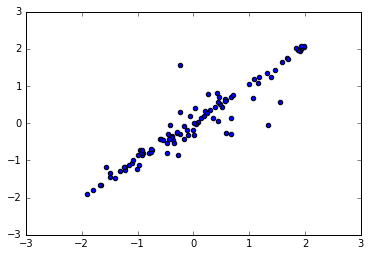

In [4]:
mean = data.mean(axis=0)
std = data.std(axis=0)
data = (data - mean) / std
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## Calculate the covariance matrix of our input

In [5]:
covariance_matrix = np.cov(data.T)

## Compute the Eigen vectors and values of our covariance matrix

In [6]:
U = np.linalg.eig(covariance_matrix)

## Rotate the data

(100, 2)


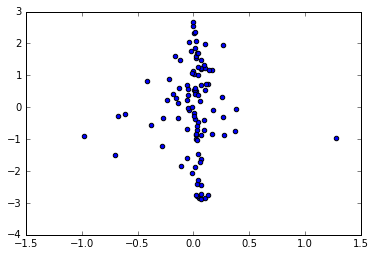

In [9]:
data_rot = np.dot(data, U[1])
plt.scatter(data_rot[:, 0], data_rot[:, 1])
plt.show()

## Divide by the Square root of Eigen values

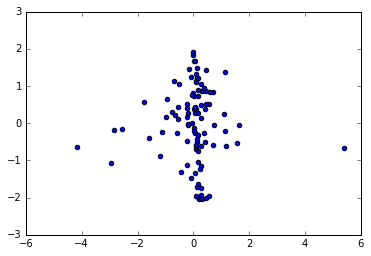

In [10]:
data_rot = np.divide(data_rot, np.sqrt(U[0] + epsilon))
plt.scatter(data_rot[:, 0], data_rot[:, 1])
plt.show()

## Perform ZCA whitening

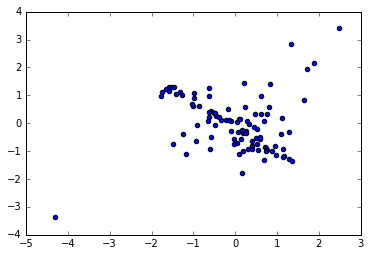

In [11]:
data_rot = np.dot(data_rot, U[1])
plt.scatter(data_rot[:, 0], data_rot[:, 1])
plt.show()